In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

laptop_df = pd.read_csv('./laptop_data_cleaned.csv')

X = laptop_df.drop(columns=['Price'])
#y = laptop_df['Price']
y = pd.cut(laptop_df['Price'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, float("inf")], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=128)


The most important details are the key specifications that consumers consider when making purchasing decisions for laptops, such as brand reputation, RAM, CPU, storage capacity etc., 

I chose to keep the price as a continuous variable for this project, as it provides more precise information than creating buckets or categories.

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(random_state=128)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred_dt = pipe.predict(X_test)

print('R2 score',r2_score(y_test,Y_pred_dt))
print('MSE',mean_squared_error(y_test,Y_pred_dt))


R2 score 1.0
MSE 0.0


The mean squared error is a measure of the difference between predicted and actual values, while the R-squared metric measures the proportion of variance in the dependent variable that is explained by the independent variables. These metrics suggest that the SVM model is overfitting the data, so it may be necessary to tune the model's hyperparameters or use cross-validation techniques to prevent overfitting and ensure generalizability.

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVC(kernel='linear')

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred_svm = pipe.predict(X_test)

print('R2 score',r2_score(y_test,Y_pred_svm))
print('MSE',mean_squared_error(y_test,Y_pred_svm))


R2 score 1.0
MSE 0.0


In [32]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(y_test, Y_pred_svm)
precision = precision_score(y_test, Y_pred_svm, average='weighted')
f1 = f1_score(y_test, Y_pred_svm, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
F1-score: 1.0


The SVM model achieved perfect accuracy, precision, and F1-score, but overfitting can occur. To optimize the model, grid search or randomized search can be used to find the best combination of hyperparameters.

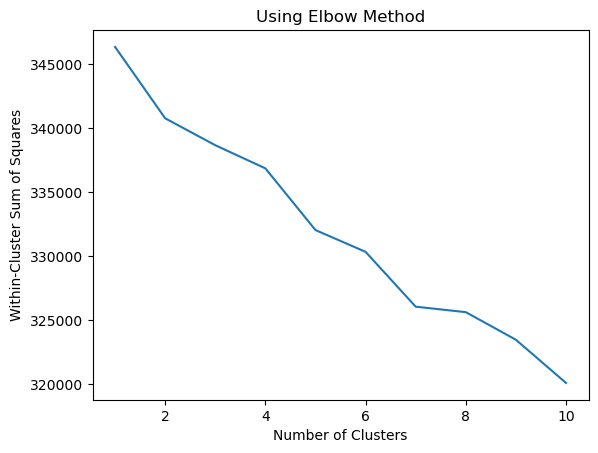

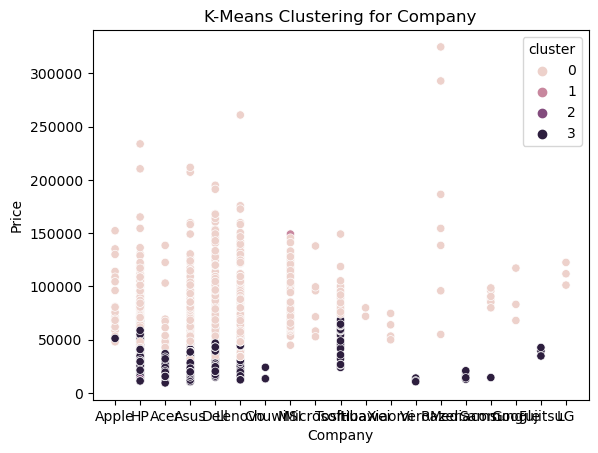

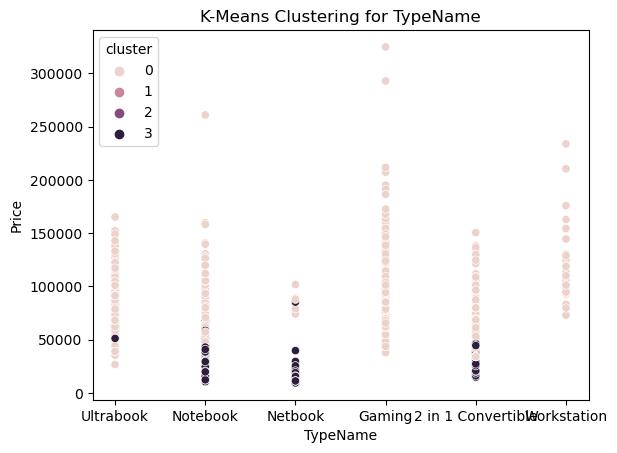

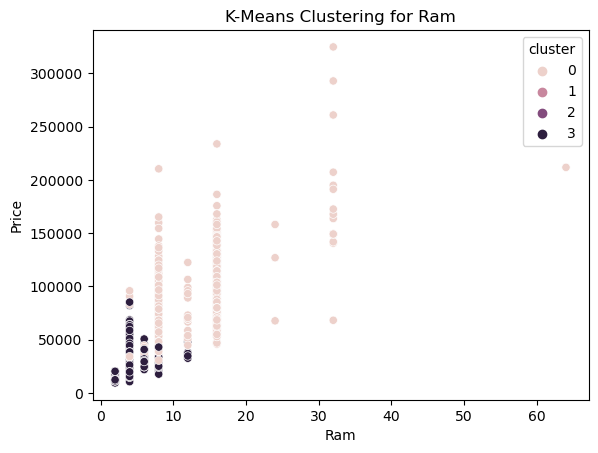

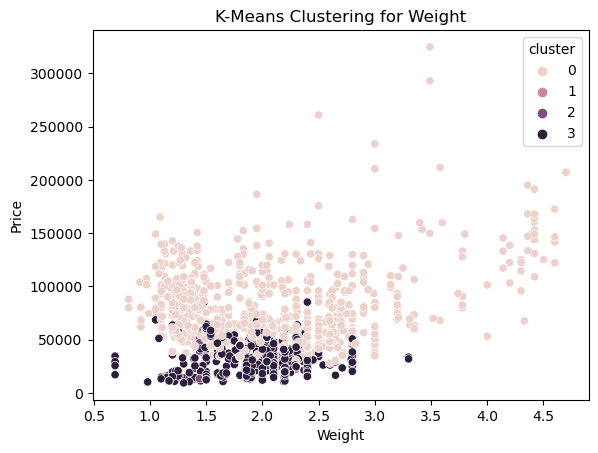

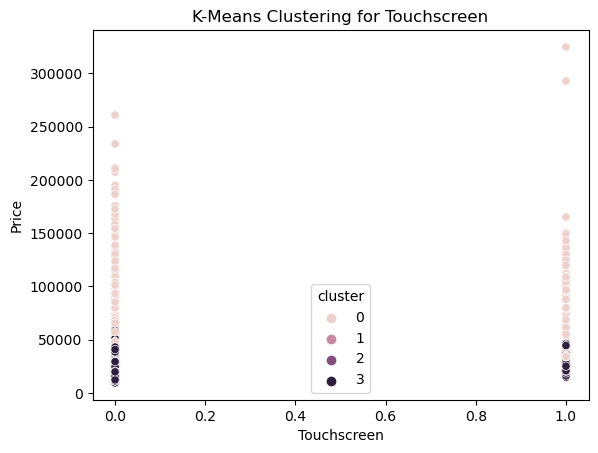

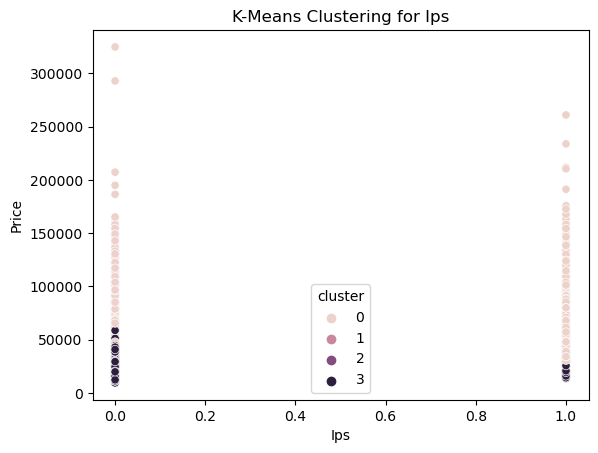

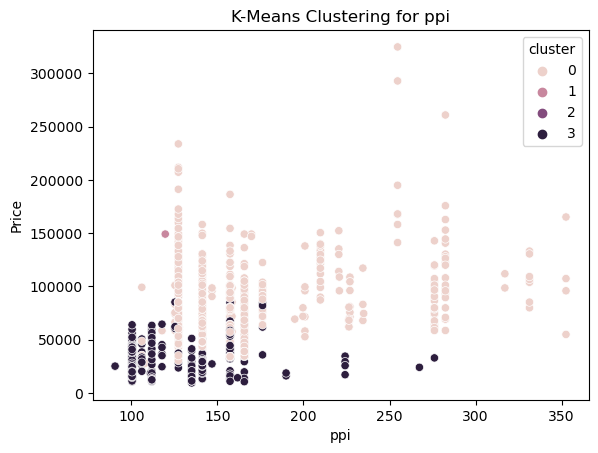

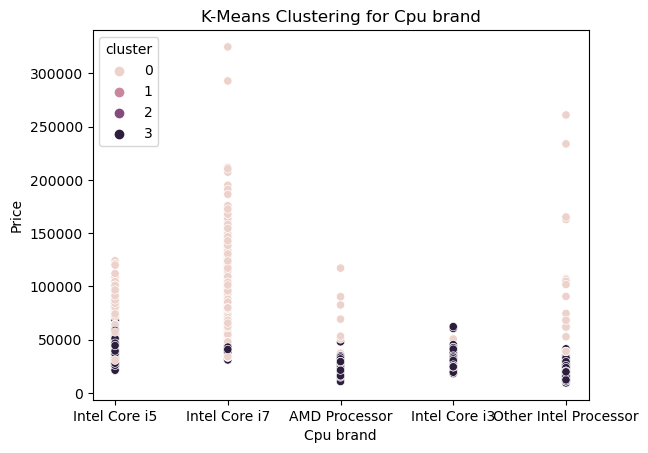

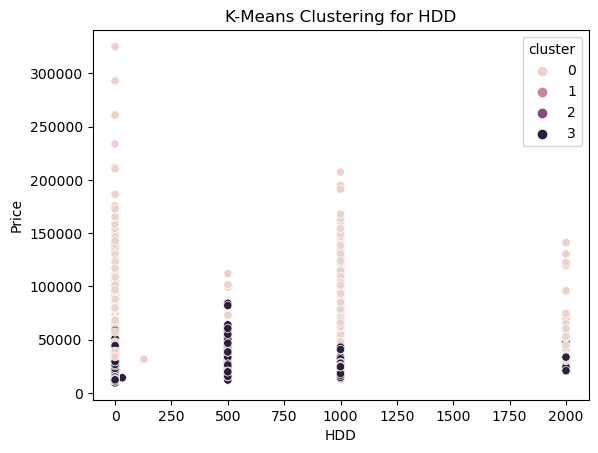

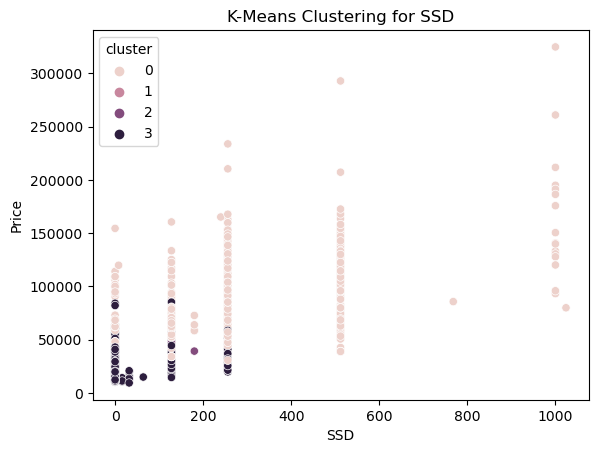

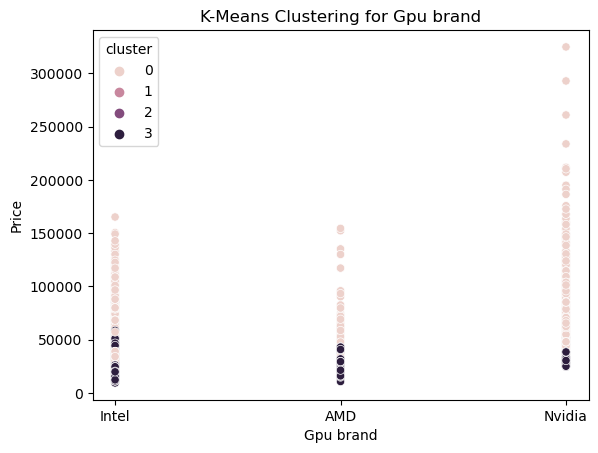

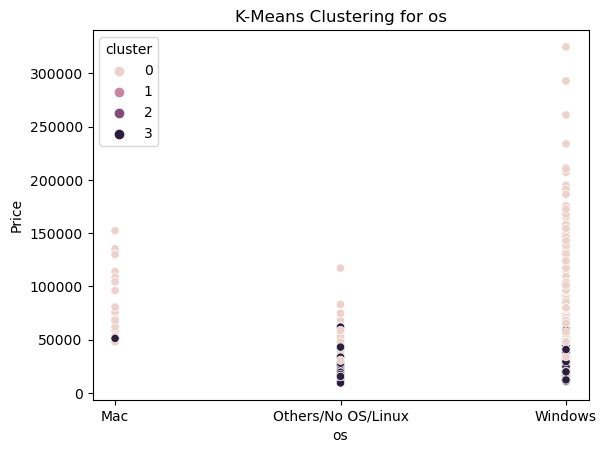

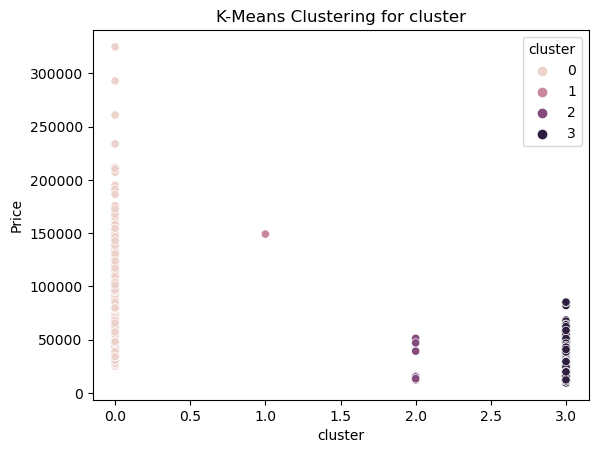

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

oneHotEn = OneHotEncoder(sparse=False,drop='first')
X_en = oneHotEn.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_en)

wcss = []
for i in range(1, 11):
    clusterMeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clusterMeans.fit(X_scaled)
    wcss.append(clusterMeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Using Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

clusterMeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusterMeans.fit(X_scaled)

laptop_df['cluster'] = clusterMeans.labels_

for x in [col for col in laptop_df.columns if col != 'Price']:
    sns.scatterplot(data=laptop_df, x=x, y='Price', hue='cluster')
    plt.title(f'K-Means Clustering for {x}')
    plt.show()


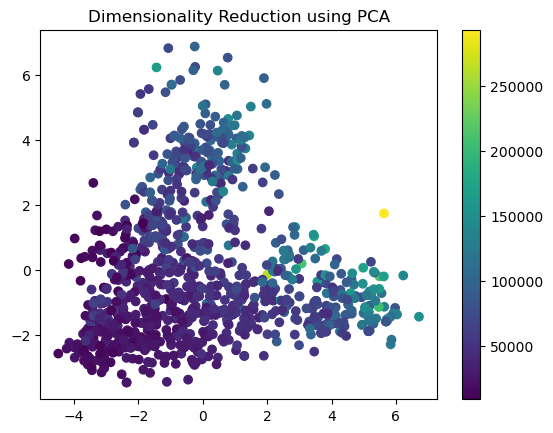

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y = laptop_df['Price']
X_train,X_test,y_train,y_test = train_test_split(X_en,y,test_size=0.2,random_state=128)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.colorbar()
plt.title('Dimensionality Reduction using PCA')
plt.show()

The reduced data scatterplot demonstrates a difference between the various price ranges but also significant overlap between the groups. This shows that there may be other significant elements, such as the brand or the specific model, that affect the price in addition to the laptop's specifications (weight, RAM, and memory).
Overall, the analysis's findings suggest to the chance for segmenting the laptop market into different types based on their features and price ranges, which can be helpful for marketing and product development. When making forecasts or conclusions based on statistics, it is crucial to keep in mind that there may be additional factors that have an impact on laptop costs as well.

This dataset is not suitable for classification models there might be chance if we choose different features to build the model

In [35]:
import numpy as np
z_scores = np.abs((laptop_df - laptop_df.mean()) / laptop_df.std())

outliers = z_scores > 3

print(outliers.sum())

Company         0
Cpu brand       0
Gpu brand       0
HDD            32
Ips             0
Price          12
Ram            21
SSD            18
Touchscreen     0
TypeName        0
Weight         33
cluster         0
os              0
ppi            63
dtype: int64


C:\Users\s546907\AppData\Local\Temp\ipykernel_18180\2329080892.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z_scores = np.abs((laptop_df - laptop_df.mean()) / laptop_df.std())


* The dataset has no missing values. However, even if the missing data were included, there might still be anomalous data in the dataset, such as outliers or extreme values that differ markedly from the rest of the data. Such abnormal data must be explored for because they can significantly affect the interpretation and modeling of the data.
* Visualizing the data using different plots, such as scatter plots, histograms, or box plots, and searching for any values that are noticeably beyond the range of the other data are a few ways to look for anomalous data. Another option is to employ statistical techniques, such as computing Z-scores or locating data points that deviate from the mean by more than a predetermined amount of standard deviation.
* To decide what is regarded anomalous or not, it is also crucial to take into account the context of the data and the precise goals of our research. For instance, an extreme value might occasionally be a legitimate data point that accurately captures a rare occurrence, while other times it might be an error or an outlier that needs to be eliminated.

Random Forest metrics:
R2 score 0.8873402378382488
MSE 0.043098118162743296


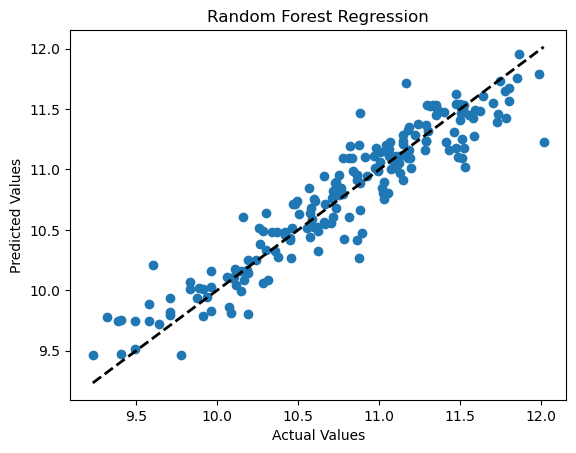

In [36]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
laptop_df = pd.read_csv('./laptop_data_cleaned.csv')
X = laptop_df.drop(columns=['Price'])
y = np.log(laptop_df['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Random Forest metrics:')

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

plt.scatter(y_test, y_pred)

# Add line of best fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')

plt.show()

The R2 score of 0.8873402378382488 indicates that the Random Forest model explains 88.73% of the variance in the target variable, which is a good fit for many applications.

The MSE of 0.043098118162743296 indicates that, on average, the Random Forest model's predictions are only off by 0.043 units of the target variable squared, which is quite low.

Overall, these metrics suggest that the Random Forest model is a good fit for the given dataset and is making accurate predictions. However, it is always a good idea to further evaluate the model's performance using additional metrics and techniques such as cross-validation, feature importance analysis, or hyperparameter tuning.

In [37]:

import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
laptop_df = pd.read_csv('./laptop_data_cleaned.csv')
X = laptop_df.drop(columns=['Price'])
y = np.log(laptop_df['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = MLPRegressor(hidden_layer_sizes=(100, 50, 10), max_iter=500, random_state=42)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('MLP Regressor metrics:')

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

MLP Regressor metrics:
R2 score -2.199773975407849
MSE 1.1714937473109337


The R2 score is negative (-2.199773975407849), which is not possible for a good model fit. This suggests that your MLP regressor is performing very poorly and is not able to capture the relationship between the input features and target variable.

The Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual values. It is a commonly used metric for regression problems. However, the value of MSE (1.1714937473109337) is quite high, indicating that the model's predictions are quite far off from the actual values.

In summary, your MLP regressor is not performing well, and you should consider either adjusting the hyperparameters or using a different model to improve your results.

We can try the following to enhance the model's performance:
* Feature selection 
* hyperparameter tuning
* Change up the model
